In [6]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('DEEP LEARNING'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv('data\Admission_Predict.csv')

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(400, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['Serial No.'], inplace=True)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [19]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [20]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [27]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_text_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))   #linear for regression always

c:\Users\Dheeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
history = model.fit(X_train_scaled, Y_train, epochs=100,validation_split=0.2)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7591 - val_loss: 0.6788
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5530 - val_loss: 0.4916
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3973 - val_loss: 0.3536
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2850 - val_loss: 0.2614
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2094 - val_loss: 0.1982
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1562 - val_loss: 0.1509
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1170 - val_loss: 0.1142
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0862 - val_loss: 0.0858
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0641 - val_loss: 0.0646
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0489 - val_loss: 0.0499
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0385 - val_loss: 0.0403
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0329 - val_lo

In [38]:
model.predict(X_text_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.6922368 ],
       [0.62203693],
       [0.7996515 ],
       [0.74401367],
       [0.82775736],
       [0.6469419 ],
       [0.69291896],
       [0.5381845 ],
       [0.49429536],
       [0.9279403 ],
       [0.80689645],
       [0.93417156],
       [0.8828231 ],
       [0.658539  ],
       [0.7390228 ],
       [0.7655298 ],
       [0.80434084],
       [0.87838197],
       [0.53924245],
       [0.7362926 ],
       [0.5772737 ],
       [0.796575  ],
       [0.83856666],
       [0.9130143 ],
       [0.7087946 ],
       [0.6174794 ],
       [0.7097414 ],
       [0.741515  ],
       [0.88884544],
       [0.64996225],
       [0.9590151 ],
       [0.60924035],
       [0.78826255],
       [0.78290856],
       [0.70489013],
       [0.6126811 ],
       [0.51138824],
       [0.7076106 ],
       [0.9203563 ],
       [0.8498749 ],
       [0.81911826],
       [0.63519806],
       [0.86038333],
       [0.66303843],
       [0.9684982 ],
       [0.7174957 ],
       [0.7357795 ],
       [0.819

In [39]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [44]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

-124319.80926933142

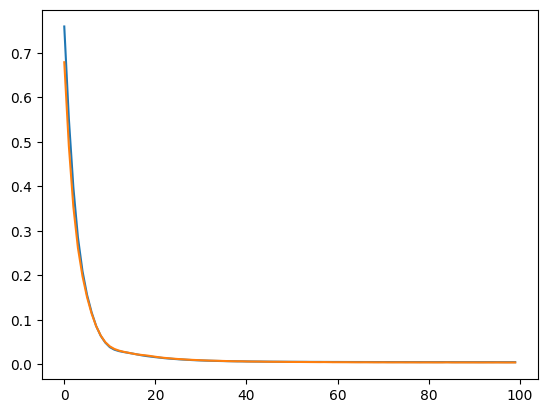

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()